In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

frame.jpg
(940, 567)
431.7112121582031
frame1.jpg
(1078, 685)
142.87767028808594
frame2.jpg
(965, 563)
60.61154556274414


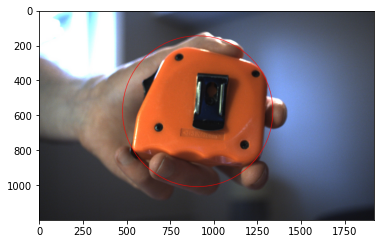

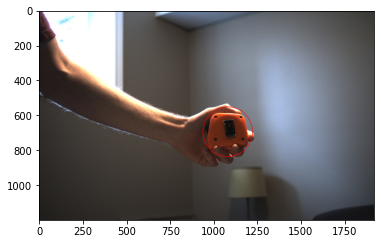

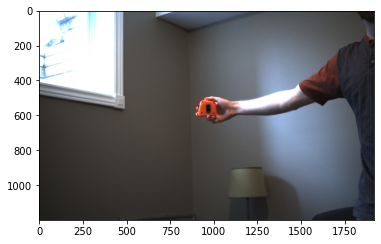

In [12]:
def getColorMask(frame):

    #setting the HSV values for the color detection
    lowerBound = np.array([0,170,80])
    upperBound = np.array([15,255,255])

    #Creating a mask for the specific color
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    return cv2.inRange(hsv, lowerBound, upperBound)


def main():
    images = ['frame.jpg','frame1.jpg','frame2.jpg']
    for frame in images:

        img = cv2.imread(frame)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #Process the frame from bayerBG to BGR (Adds color to image)
        #frame_bgr = cv2.demosaicing(frame, cv2.COLOR_BayerBG2BGR)
        #Create a mask for the designated color
        mask_frame = getColorMask(img)

        #Filter the Mask using a median filter (gets rid of salt and pepper)
        mask_frame = cv2.medianBlur(mask_frame,5)

        #Find the contours of the mask
        cnts = cv2.findContours(mask_frame.copy(), cv2.RETR_EXTERNAL,
                cv2.CHAIN_APPROX_SIMPLE)[-2]
        center = None
        
        if len(cnts) > 0:
                # find the largest contour in the mask, then use
                # it to compute the minimum enclosing circle and
                # centroid
                c = max(cnts, key=cv2.contourArea)
                ((x, y), radius) = cv2.minEnclosingCircle(c)
                M = cv2.moments(c)
                center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])) 
        if radius > 0.5:
                    # draw the circle and centroid on the frame,q
                    # then update the list of tracked points
                    #cv2.circle(mask_frame, (int(x), int(y)), int(radius), color, 2)
                    cv2.circle(img, (int(x), int(y)), int(radius), (0, 0, 255), 2)


        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(img)
        print(frame)
        print(center)
        print(radius)

if __name__ == '__main__':
    main()

first image: tensor([[0.9048]])
second image: tensor([[0.8405]])
third image: tensor([[0.8862]])


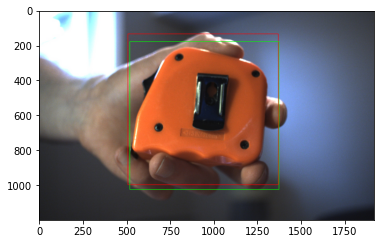

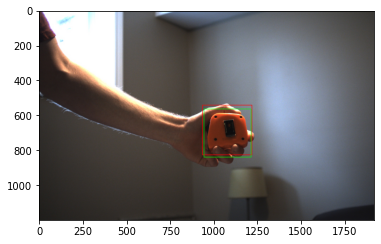

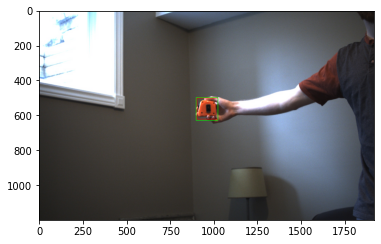

In [27]:
import torch
import torchvision.ops.boxes as bops
img1 = cv2.imread('frame.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#Variables for the bounding box location (human vs prediction)
min_img1_ai = (509,136)
max_img1_ai = (1371,998)
min_img1_human = (520,180)
max_img1_human = (1375,1025)
#Drawing the boxes onto the image
cv2.rectangle(img1, pt1=min_img1_ai, pt2=max_img1_ai, color=(255,0,0), thickness=2)
cv2.rectangle(img1, pt1=min_img1_human, pt2=max_img1_human, color=(0,255,0), thickness=2)
plt.figure()
plt.imshow(img1)

#Calculating the IoU of the bounding boxes
box1 = torch.tensor([[509, 136, 1371, 998]], dtype=torch.float)
box2 = torch.tensor([[520, 180, 1375, 1025]], dtype=torch.float)
iou = bops.box_iou(box1, box2)
print('first image: ' + str(iou))


#################################################################
img2 = cv2.imread('frame1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#Variables for the bounding box location (human vs prediction)
min_img2_ai = (936,543)
max_img2_ai = (1220,827)
min_img2_human = (945,565)
max_img2_human = (1215,840)
#Drawing the boxes onto the image
cv2.rectangle(img2, pt1=min_img2_ai, pt2=max_img2_ai, color=(255,0,0), thickness=2)
cv2.rectangle(img2, pt1=min_img2_human, pt2=max_img2_human, color=(0,255,0), thickness=2)
plt.figure()
plt.imshow(img2)

#Calculating the IoU of the bounding boxes
box1 = torch.tensor([[936, 543, 1220, 827]], dtype=torch.float)
box2 = torch.tensor([[945, 565, 1215, 840]], dtype=torch.float)
iou = bops.box_iou(box1, box2)
print('second image: ' + str(iou))

#################################################################
img3 = cv2.imread('frame2.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
#Variables for the bounding box location (human vs prediction)
min_img3_ai = (905,503)
max_img3_ai = (1025,623)
min_img3_human = (900,500)
max_img3_human = (1025,630)
#Drawing the boxes onto the image
cv2.rectangle(img3, pt1=min_img3_ai, pt2=max_img3_ai, color=(255,0,0), thickness=2)
cv2.rectangle(img3, pt1=min_img3_human, pt2=max_img3_human, color=(0,255,0), thickness=2)
plt.figure()
plt.imshow(img3)

#Calculating the IoU of the bounding boxes
box1 = torch.tensor([[905, 503, 1025, 623]], dtype=torch.float)
box2 = torch.tensor([[900, 500, 1025, 630]], dtype=torch.float)
iou = bops.box_iou(box1, box2)
print('third image: ' + str(iou))